In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
corner_track_param = dict(maxCorners = 10,qualityLevel = 0.3,minDistance = 7,blockSize = 7  )

In [4]:
lk_params = dict(winSize=(200,200),maxLevel = 2, criteria = (cv2.TERM_CRITERIA_EPS | cv2.TERM_CRITERIA_COUNT,10,0.03))

In [7]:
cap = cv2.VideoCapture(0)
ret,prev_frame = cap.read()

prev_gray = cv2.cvtColor(prev_frame,cv2.COLOR_BGR2GRAY)

prev_pts = cv2.goodFeaturesToTrack(prev_gray,mask=None,**corner_track_param)

mask = np.zeros_like(prev_frame)

while True : 

    ret,frame = cap.read()

    frame_gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

    nextPts,status,err = cv2.calcOpticalFlowPyrLK(prev_gray,frame_gray,prev_pts,None,**lk_params)

    good_new = nextPts[status==1]
    good_prev = prev_pts[status==1]

    for i,(new,prev) in enumerate(zip(good_new,good_prev)):
        x_new,y_new = new.ravel().astype(int)
        x_prev,y_prev = prev.ravel().astype(int)
        # cv2.line()
        mask = cv2.line(mask,(x_new,y_new),(x_prev,y_prev),(0,255,0),3)

        frame = cv2.circle(frame,(x_new,y_new),8,(0,0,255),-1)

    img = cv2.add(frame,mask)
    cv2.imshow('tracking',img)

    k= cv2.waitKey(30) & 0xFF

    if k==27:
        break     
    
    prev_gray = frame_gray.copy()
    prev_pts = good_new.reshape(-1,1,2)

cv2.destroyAllWindows()
cap.release()


In [3]:
cap = cv2.VideoCapture(0)

ret,frame1 = cap.read()

prev_img = cv2.cvtColor(frame1,cv2.COLOR_BGR2GRAY)

hsv_mask = np.zeros_like(frame1)
hsv_mask[:,:,1] = 255

while True: 
    ret, frame2 = cap.read()

    next_img = cv2.cvtColor(frame2,cv2.COLOR_BGR2GRAY)

    flow = cv2.calcOpticalFlowFarneback(prev_img,next_img,None,0.5,3,15,3,5,1.2,0)

    mag,ang = cv2.cartToPolar(flow[:,:,0],flow[:,:,1],angleInDegrees=True)

    hsv_mask[:,:,0] = ang/2

    hsv_mask[:,:,2] = cv2.normalize(mag,None,0,255,cv2.NORM_MINMAX)

    bgr = cv2.cvtColor(hsv_mask,cv2.COLOR_HSV2BGR)
    cv2.imshow('frame',bgr)

    k = cv2.waitKey(0) & 0xFF
    if k==27 : 
        break
    prev_img = next_img

cap.release()
cv2.destroyAllWindows()

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [3]:
cap  = cv2.VideoCapture(0)

ret,frame = cap.read()

face_cascade = cv2.CascadeClassifier('DATA\haarcascades\haarcascade_frontalface_default.xml')
face_rects = face_cascade.detectMultiScale(frame)

(face_x,face_y,w,h) = tuple(face_rects[0])
track_window = (face_x,face_y,w,h)

roi = frame[face_y:face_y+h,face_x:face_x+w]

hsv_roi = cv2.cvtColor(roi,cv2.COLOR_BGR2HSV)

roi_hist = cv2.calcHist([hsv_roi],[0],None,[180],[0,180])

cv2.normalize(roi_hist,roi_hist,0,255,cv2.NORM_MINMAX)

term_crit = (cv2.TERM_CRITERIA_EPS |  cv2.TERM_CRITERIA_COUNT,10,1)

while True:
    ret,frame = cap.read()

    if ret == True:
        hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)
        dst = cv2.calcBackProject([hsv],[0],roi_hist,[0,180],1)

        ret,track_window = cv2.meanShift(dst,track_window,term_crit)

        x,y,w,h = track_window
        img2 = cv2.rectangle(frame,(x,y),(x+w,y+h),(0,0,255),5)

        cv2.imshow('img',img2)

        k=cv2.waitKey(1) & 0xFF

        if k==27:
            break
        else :
            break

cv2.destroyAllWindows()
cap.release()


<>:5: SyntaxWarning: invalid escape sequence '\h'
<>:5: SyntaxWarning: invalid escape sequence '\h'
C:\Users\admin\AppData\Local\Temp\ipykernel_1344\2329184310.py:5: SyntaxWarning: invalid escape sequence '\h'
  face_cascade = cv2.CascadeClassifier('DATA\haarcascades\haarcascade_frontalface_default.xml')
C:\Users\admin\AppData\Local\Temp\ipykernel_1344\2329184310.py:5: SyntaxWarning: invalid escape sequence '\h'
  face_cascade = cv2.CascadeClassifier('DATA\haarcascades\haarcascade_frontalface_default.xml')


IndexError: tuple index out of range

In [1]:
import numpy as np
from numpy import genfromtxt

In [3]:
data = genfromtxt(r'DATA\bank_note_data.txt',delimiter=',')

In [4]:
data

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699,   0.     ],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ,   0.     ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645,   0.     ],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ,   1.     ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ,   1.     ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ,   1.     ]])

In [5]:
labels = data[:,4]

In [6]:
labels

array([0., 0., 0., ..., 1., 1., 1.])

In [7]:
features = data[:,0:4]

In [8]:
features

array([[  3.6216 ,   8.6661 ,  -2.8073 ,  -0.44699],
       [  4.5459 ,   8.1674 ,  -2.4586 ,  -1.4621 ],
       [  3.866  ,  -2.6383 ,   1.9242 ,   0.10645],
       ...,
       [ -3.7503 , -13.4586 ,  17.5932 ,  -2.7771 ],
       [ -3.5637 ,  -8.3827 ,  12.393  ,  -1.2823 ],
       [ -2.5419 ,  -0.65804,   2.6842 ,   1.1952 ]])

In [9]:
X = features
y = labels

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [12]:
len(X_train)

919

In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
scaler_object = MinMaxScaler()

In [15]:
scaler_object.fit(X_train)

MinMaxScaler()

In [16]:
scaled_X_train = scaler_object.transform(X_train)

In [17]:
scaled_X_test = scaler_object.transform(X_test)

In [19]:
from keras.models import Sequential
from keras.layers import Dense

In [21]:
model = Sequential()

model.add(Dense(4,input_dim=4,activation='relu'))

model.add(Dense(8,activation='relu'))

model.add(Dense(1,activation='sigmoid'))

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [23]:
model.fit(scaled_X_train,y_train,epochs=50,verbose=2)

Epoch 1/50
29/29 - 2s - 68ms/step - accuracy: 0.5647 - loss: 0.6709
Epoch 2/50
29/29 - 0s - 4ms/step - accuracy: 0.5647 - loss: 0.6621
Epoch 3/50
29/29 - 0s - 5ms/step - accuracy: 0.5647 - loss: 0.6545
Epoch 4/50
29/29 - 0s - 5ms/step - accuracy: 0.5647 - loss: 0.6466
Epoch 5/50
29/29 - 0s - 5ms/step - accuracy: 0.5647 - loss: 0.6373
Epoch 6/50
29/29 - 0s - 6ms/step - accuracy: 0.5669 - loss: 0.6270
Epoch 7/50
29/29 - 0s - 4ms/step - accuracy: 0.5887 - loss: 0.6143
Epoch 8/50
29/29 - 0s - 4ms/step - accuracy: 0.6279 - loss: 0.6016
Epoch 9/50
29/29 - 0s - 6ms/step - accuracy: 0.6670 - loss: 0.5882
Epoch 10/50
29/29 - 0s - 4ms/step - accuracy: 0.6986 - loss: 0.5737
Epoch 11/50
29/29 - 0s - 7ms/step - accuracy: 0.7454 - loss: 0.5581
Epoch 12/50
29/29 - 0s - 4ms/step - accuracy: 0.7661 - loss: 0.5416
Epoch 13/50
29/29 - 0s - 4ms/step - accuracy: 0.7900 - loss: 0.5248
Epoch 14/50
29/29 - 0s - 4ms/step - accuracy: 0.7976 - loss: 0.5077
Epoch 15/50
29/29 - 0s - 5ms/step - accuracy: 0.8161 - l

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
predictions = (model.predict(scaled_X_test) > 0.5).astype("int")


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [27]:
confusion_matrix(y_test,predictions)

array([[253,   4],
       [ 11, 185]], dtype=int64)

In [28]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97       257
         1.0       0.98      0.94      0.96       196

    accuracy                           0.97       453
   macro avg       0.97      0.96      0.97       453
weighted avg       0.97      0.97      0.97       453



In [29]:
from keras.datasets import mnist

In [39]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [40]:
import matplotlib.pyplot as plt

In [41]:
single_img = x_train[0]

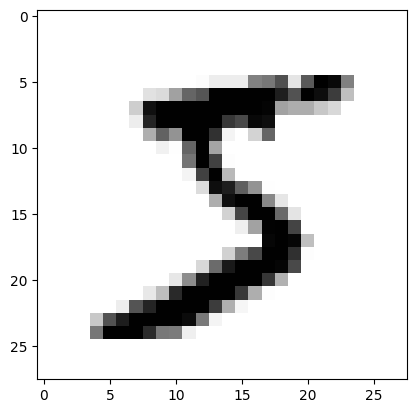

In [42]:
plt.imshow(single_img,cmap='gray_r')

In [43]:
from tensorflow.keras.utils import to_categorical

In [44]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [45]:
y_cat_test = to_categorical(y_test,10)
y_cat_train = to_categorical(y_train,10)

In [46]:
x_train = x_train/x_train.max()

In [47]:
x_test = x_test/x_test.max()

In [48]:
scaled_img = x_train[0]

In [49]:
scaled_img

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [50]:
x_train.shape

(60000, 28, 28)

In [51]:
x_train = x_train.reshape(60000, 28, 28,1)

In [52]:
x_test = x_test.reshape(10000,28,28,1)

In [83]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [54]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(4,4),input_shape=(28,28,1),activation='relu'))

model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))

model.add(Dense(10,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='rmsprop',metrics=['accuracy'])

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [56]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 25, 25, 32)     │           544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       589,952 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 591,786 (2.26 MB)

 Trainable params: 591,786 (2.26 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.fit(x_train,y_cat_train,epochs=2)

Epoch 1/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 38s 19ms/step - accuracy: 0.9150 - loss: 0.2820
Epoch 2/2
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 34s 18ms/step - accuracy: 0.9852 - loss: 0.0493


In [59]:
model.evaluate(x_test,y_cat_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9820 - loss: 0.0562


[0.045281510800123215, 0.9854999780654907]

In [61]:
from sklearn.metrics import classification_report

In [60]:
predictions = (model.predict(x_test) > 0.5).astype("int")

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [63]:
predictions

array([[0, 0, 0, ..., 1, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [64]:
print(classification_report(y_cat_test,predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.98      0.98      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.98       892
           6       1.00      0.96      0.98       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.98      0.99       974
           9       0.99      0.96      0.98      1009

   micro avg       0.99      0.98      0.99     10000
   macro avg       0.99      0.98      0.99     10000
weighted avg       0.99      0.98      0.99     10000
 samples avg       0.98      0.98      0.98     10000



c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [65]:
import cv2

In [67]:
cat4 = cv2.imread(r'CATS_DOGS\train\CAT\4.jpg')

In [68]:
cat4 = cv2.cvtColor(cat4,cv2.COLOR_BGR2RGB)

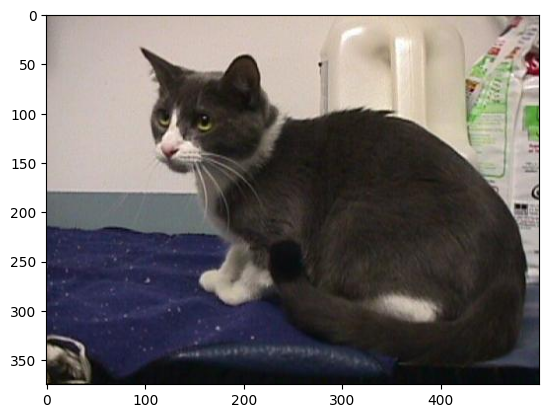

In [69]:
plt.imshow(cat4)

In [70]:
dog = cv2.imread(r'CATS_DOGS\train\DOG\2.jpg')

In [71]:
dog = cv2.cvtColor(dog,cv2.COLOR_BGR2RGB)

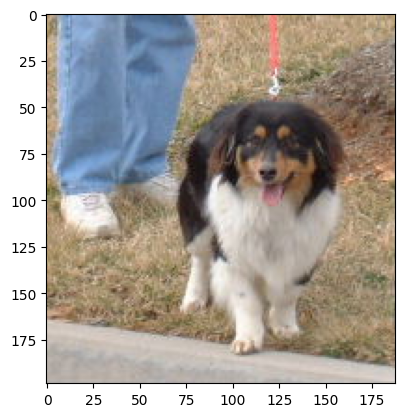

In [72]:
plt.imshow(dog)

In [74]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [75]:
image_gen = ImageDataGenerator(rotation_range=30,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               rescale = 1/255,
                               shear_range = 0.2,
                               zoom_range = 0.2,
                               horizontal_flip = True,
                               fill_mode='nearest')


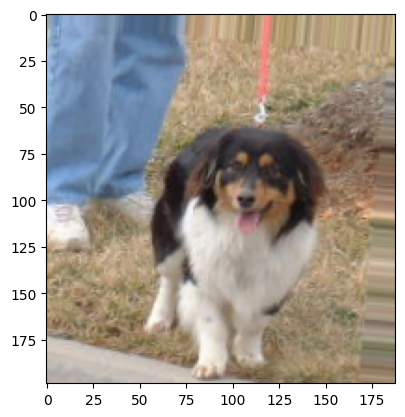

In [80]:
plt.imshow(image_gen.random_transform(dog))

In [81]:
image_gen.flow_from_directory(r'CATS_DOGS\train')

Found 18743 images belonging to 2 classes.


In [88]:
from keras.models import Sequential
from keras.layers import Activation,MaxPooling2D,Conv2D,Dropout,Flatten,Dense

In [89]:
model = Sequential()

model.add(Conv2D(filters=32,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=(150,150,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())

model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

c:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [90]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_1 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 34, 34, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 128)            │     2,367,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 1)              │           129 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,424,065 (9.25 MB)

 Trainable params: 2,424,065 (9.25 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
cam = cv2.VideoCapture(0)

num_frames = 0

while True:
    ret,frame = cam.read()

    frame_copy = frame.copy()

    roi = frame[roi_]